In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import matplotlib 

matplotlib.font_manager._rebuild()

plt.rc("font", family="Malgun Gothic")

In [3]:
food = pd.read_csv('04_음식관련 카드소비_CARD_SPENDING.CSV', encoding = 'cp949')

In [4]:
food

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674
...,...,...,...,...,...,...,...,...
544800,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250
544801,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974
544802,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832
544803,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715


In [5]:
food1 = food.drop(columns=['city','emd_cd','mct_cat_cd'])

In [6]:
food1['base_date'] = pd.to_datetime(food1['base_date'])
food1['month'] = food1['base_date'].dt.month

In [7]:
food2 = food1.groupby(['base_date','month','emd_nm','mct_cat_nm']).agg(sum).unstack().reset_index()

In [8]:
food2.head()

base_date month emd_nm use_cnt                                     \
mct_cat_nm                              간식  농축수산물 마트/슈퍼마켓     배달    부페     식품   
0          2018-01-01     1    건입동    79.0   34.0   589.0    5.0   NaN  152.0   
1          2018-01-01     1    구좌읍    79.0   25.0   329.0    5.0   NaN  231.0   
2          2018-01-01     1    남원읍   108.0   54.0   466.0   25.0   5.0  295.0   
3          2018-01-01     1    노형동  1007.0  216.0  4905.0  123.0  15.0  943.0   
4          2018-01-01     1    대륜동   128.0   29.0   859.0   20.0   NaN  142.0   

                   ...     use_amt                                     \
mct_cat_nm  아시아음식  ...       농축수산물      마트/슈퍼마켓         배달         부페   
0            44.0  ...   1824556.0   19891147.0    54010.0        NaN   
1            25.0  ...   1466175.0   11489793.0    66285.0        NaN   
2            34.0  ...   2199680.0   24828201.0   644192.0   294600.0   
3           363.0  ...  12964266.0  168640726.0  2185932.0  2770222.0   
4            64.0  ...    354993.0   37971731.0   396728.0        NaN   

                                                                      \
mct_cat_nm          식품       아시아음식         양식    주점및주류판매       패스트푸드   
0            6831676.0   1836340.0  2250744.0   371196.0   1802952.0   
1            9145022.0   1627174.0   400165.0        NaN    522326.0   
2           16392477.0   1854998.0   685927.0    98200.0   1365176.0   
3           32230959.0  16315635.0  9566325.0  1807862.0  17550255.0   
4            3178292.0   3405576.0  2081644.0   262685.0   3380044.0   

                         
mct_cat_nm           한식  
0            25816289.0  
1            17660288.0  
2            19474238.0  
3           129584867.0  
4            19997939.0  

[5 rows x 25 columns]

In [9]:
food3 = food1.groupby(['base_date','month','emd_nm']).agg(sum).reset_index()

In [10]:
food4 = food2.fillna(0)

In [11]:
food4

base_date month emd_nm use_cnt                                     \
mct_cat_nm                              간식  농축수산물 마트/슈퍼마켓     배달    부페     식품   
0          2018-01-01     1    건입동    79.0   34.0   589.0    5.0   0.0  152.0   
1          2018-01-01     1    구좌읍    79.0   25.0   329.0    5.0   0.0  231.0   
2          2018-01-01     1    남원읍   108.0   54.0   466.0   25.0   5.0  295.0   
3          2018-01-01     1    노형동  1007.0  216.0  4905.0  123.0  15.0  943.0   
4          2018-01-01     1    대륜동   128.0   29.0   859.0   20.0   0.0  142.0   
...               ...   ...    ...     ...    ...     ...    ...   ...    ...   
56183      2021-06-30     6    표선면    60.0   35.0   423.0   75.0   0.0  236.0   
56184      2021-06-30     6    한경면    80.0   20.0   423.0   40.0   0.0  241.0   
56185      2021-06-30     6    한림읍   136.0   80.0   669.0  257.0   5.0  599.0   
56186      2021-06-30     6    화북동   362.0  352.0  1645.0  644.0   0.0  513.0   
56187      2021-06-30     6    효돈동    15.0   45.0   322.0   15.0   0.0  151.0   

                   ...     use_amt                                      \
mct_cat_nm  아시아음식  ...       농축수산물      마트/슈퍼마켓          배달         부페   
0            44.0  ...   1824556.0   19891147.0     54010.0        0.0   
1            25.0  ...   1466175.0   11489793.0     66285.0        0.0   
2            34.0  ...   2199680.0   24828201.0    644192.0   294600.0   
3           363.0  ...  12964266.0  168640726.0   2185932.0  2770222.0   
4            64.0  ...    354993.0   37971731.0    396728.0        0.0   
...           ...  ...         ...          ...         ...        ...   
56183        20.0  ...  25487010.0   38310391.0   1855783.0        0.0   
56184        40.0  ...   4176912.0   17679746.0    697661.0        0.0   
56185       106.0  ...  13545991.0   42071373.0   5508665.0   183344.0   
56186       146.0  ...  46895646.0   48460831.0  13370520.0        0.0   
56187        25.0  ...   4366442.0   15563575.0    291740.0        0.0   

                                                                      \
mct_cat_nm          식품       아시아음식         양식    주점및주류판매       패스트푸드   
0            6831676.0   1836340.0  2250744.0   371196.0   1802952.0   
1            9145022.0   1627174.0   400165.0        0.0    522326.0   
2           16392477.0   1854998.0   685927.0    98200.0   1365176.0   
3           32230959.0  16315635.0  9566325.0  1807862.0  17550255.0   
4            3178292.0   3405576.0  2081644.0   262685.0   3380044.0   
...                ...         ...        ...        ...         ...   
56183        6781949.0    653900.0  1166960.0  1063845.0    816369.0   
56184        7528753.0   1167966.0   842022.0   125750.0   1155391.0   
56185       26230243.0   2325369.0  4334225.0        0.0   3257428.0   
56186       21022684.0   5774943.0  1997413.0   416987.0   4305680.0   
56187        7113275.0    596055.0   112672.0        0.0    507024.0   

                         
mct_cat_nm           한식  
0            25816289.0  
1            17660288.0  
2            19474238.0  
3           129584867.0  
4            19997939.0  
...                 ...  
56183        13866905.0  
56184         6915244.0  
56185        30940536.0  
56186        45292736.0  
56187         2370891.0  

[56188 rows x 25 columns]

In [12]:
day = pd.read_csv('일별_쓰레기.csv')

In [13]:
day['base_date'] = pd.to_datetime(day['base_date'])
day['month'] = day['base_date'].dt.month

In [14]:
day1 = day.groupby(['base_date','month','emd_nm']).agg(sum).reset_index()

In [15]:
day1.to_csv('월별_쓰레기.csv', index=False)

In [16]:
alldata = pd.merge(day1,food4, on =['base_date','month','emd_nm'], how ='left')

In [17]:
alldata.to_csv('음식물_카드.csv',index=False)

<AxesSubplot:>

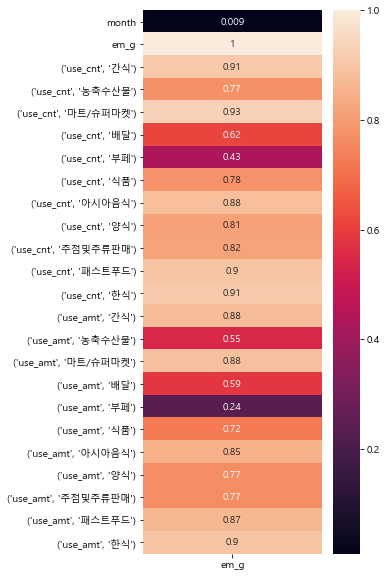

In [18]:
fig = plt.figure(figsize=(4, 10))
sns.heatmap(alldata.corr()[['em_g']], annot=True)

In [19]:
alldata1 = pd.merge(alldata,food3, on =['base_date','month','emd_nm'], how ='left')

<AxesSubplot:>

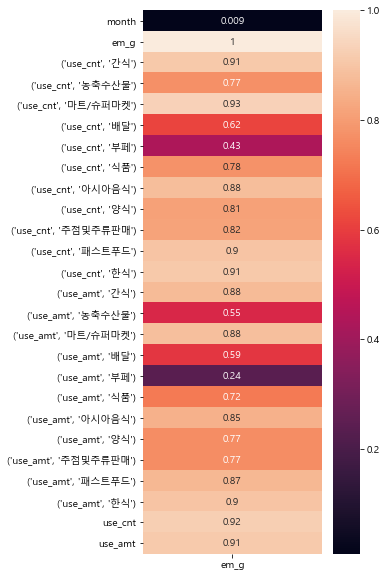

In [20]:
fig = plt.figure(figsize=(4, 10))
sns.heatmap(alldata1.corr()[['em_g']], annot=True)

In [21]:
food3.to_csv('월별_음식카드.csv',index=False)

In [24]:
food5 = pd.merge(food3,food4, how='left', on =['base_date','emd_nm','month'])

In [27]:
food5

,base_date,month,emd_nm,use_cnt,use_amt,"(use_cnt, 간식)","(use_cnt, 농축수산물)","(use_cnt, 마트/슈퍼마켓)","(use_cnt, 배달)","(use_cnt, 부페)",...,"(use_amt, 농축수산물)","(use_amt, 마트/슈퍼마켓)","(use_amt, 배달)","(use_amt, 부페)","(use_amt, 식품)","(use_amt, 아시아음식)","(use_amt, 양식)","(use_amt, 주점및주류판매)","(use_amt, 패스트푸드)","(use_amt, 한식)"
0,2018-01-01,1,건입동,1806,61606900,79.0,34.0,589.0,5.0,0.0,...,1824556.0,19891147.0,54010.0,0.0,6831676.0,1836340.0,2250744.0,371196.0,1802952.0,25816289.0
1,2018-01-01,1,구좌읍,1180,43303254,79.0,25.0,329.0,5.0,0.0,...,1466175.0,11489793.0,66285.0,0.0,9145022.0,1627174.0,400165.0,0.0,522326.0,17660288.0
2,2018-01-01,1,남원읍,1581,69402997,108.0,54.0,466.0,25.0,5.0,...,2199680.0,24828201.0,644192.0,294600.0,16392477.0,1854998.0,685927.0,98200.0,1365176.0,19474238.0
3,2018-01-01,1,노형동,12507,403571632,1007.0,216.0,4905.0,123.0,15.0,...,12964266.0,168640726.0,2185932.0,2770222.0,32230959.0,16315635.0,9566325.0,1807862.0,17550255.0,129584867.0
4,2018-01-01,1,대륜동,2032,72541912,128.0,29.0,859.0,20.0,0.0,...,354993.0,37971731.0,396728.0,0.0,3178292.0,3405576.0,2081644.0,262685.0,3380044.0,19997939.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56183,2021-06-30,6,표선면,1336,90632868,60.0,35.0,423.0,75.0,0.0,...,25487010.0,38310391.0,1855783.0,0.0,6781949.0,653900.0,1166960.0,1063845.0,816369.0,13866905.0
56184,2021-06-30,6,한경면,1286,45263612,80.0,20.0,423.0,40.0,0.0,...,4176912.0,17679746.0,697661.0,0.0,7528753.0,1167966.0,842022.0,125750.0,1155391.0,6915244.0
56185,2021-06-30,6,한림읍,3044,130156819,136.0,80.0,669.0,257.0,5.0,...,13545991.0,42071373.0,5508665.0,183344.0,26230243.0,2325369.0,4334225.0,0.0,3257428.0,30940536.0
56186,2021-06-30,6,화북동,5644,191816310,362.0,352.0,1645.0,644.0,0.0,...,46895646.0,48460831.0,13370520.0,0.0,21022684.0,5774943.0,1997413.0,416987.0,4305680.0,45292736.0


In [29]:
food5.to_csv('카드_전부.csv',index=False)